In [14]:
import pandas as pd, os, numpy as np, random as r, pickle
from matplotlib import pyplot as plt

# Things to consider:
   # Should I store viable middles and edges?
      # YES: DONE – SEE ./MERGE_SAFETY

# WRITTEN #
   # Pick the four mechanisms and if they will be cathodic – scaling factor auto-assigned
   # Assign a file to the mechanism – CURRENTLY DUMMY FILES
   # Calculate merge points
      # Calculate fractional peak currents
      # Select representative scan rate to dictate the merge points
      # Calculate peak ratio and reversibility
   # Scale and flip mechanisms
   # Randomly select merge point from [min(merge_point), min(merge_point)+1000mV]
   # If change in current over first and last 100mV is less than 0.05, it can be merged from that side
   # This could be a consideration when selecting files 
   # If the switching potential is before diffusion limited current is reached, the current cant't 
      # reasonably be extrapolated – that datatset could be labelled as a terminal candidate, though

def plot(df):
   for v in df['v'].unique():
      t = df.loc[df['v'] == v].copy()
      if 'newA' in t.columns:
         plt.scatter(t['V'], t['A'], s=0.1)
      else:
         plt.scatter(t['V'], t['A'], s=0.1)
   plt.show()
   plt.clf()

class Mech:
   def __init__(self, mech, cathodic):
      self.mech = mech
      self.cathodic = cathodic
      self.data = None
      self.file = None
      self.scaling = r.randint(80, 100)/100

   def __str__(self):
      return f'Mech: {self.mech}, Cathodic: {self.cathodic}, Scaling: {self.scaling}, File: {self.file}'

# Step zero, label each available file as either mergeable, half-mergeable, or not mergeable

# Step one – pick the four mechanisms (NO ERRORS)
def get_mechs():
   mechs = [None]*4
   x = r.randint(1, 8)
   if x == 1:
      cath = round(r.random())
      if cath:
         mechs[0] = Mech("T", True)
      else:
         mechs[-1] = Mech("T", False)

   x = r.randint(1, 8)
   if x == 2:
      cath = round(r.random())
      if cath and not mechs[0]:
         mechs[0] = Mech("ECP", True)
      elif cath:
         mechs[-1] = Mech("ECP", False)
      elif mechs[-1]:
         mechs[0] = Mech("ECP", True)
      else:
         mechs[-1] = Mech("ECP", False)

   # EC1 is equal to EC anodic or CE cathodic, EC2 is equal to CE anodic or EC cathodic
   remaining_mechs = ["E", "EC1", "ECE", "DISP", "SR", "CE"]
   for i, spot in enumerate(mechs):
      if not spot:
         x = r.randint(0, 5)
         cathodic = True if round(r.random()) == 1 else False
         mechs[i] = Mech(remaining_mechs[x], cathodic)
   
   return mechs

In [44]:
# Step two – select files (NO ERRORS)
def get_files(mechs):
   for i, mech in enumerate(mechs):
      # safe means it can be merged from either side, so no special consideration is necessary
      safe = pickle.load(open(f'./Merge_Safety/{mech.mech}_safe.pkl', 'rb'))
      # half safe means it is useable as a beginning or terminal mechanism so needs to be looked at
      half_safe = pickle.load(open(f'./Merge_Safety/{mech.mech}_half_safe.pkl', 'rb'))
      if i == 1 or i == 2:
         file = r.choice(list(safe.keys()))
      # considerations on if T or ECP need to be flipped have already been made so pick any file
      elif mech.mech == 'T' or mech.mech == 'ECP':
         options = list(safe.keys())
         options.extend(list(half_safe.keys()))
         file = r.choice(options)
      else:
         options = list(safe.keys())
         options.extend(list(half_safe.keys()))
         file = r.choice(options)
         if file not in safe:
            # if data is only mergeable from one side, we may need to over-ride the assigned flipping
            left_safe = half_safe[file][0]
            right_safe = half_safe[file][1]
            if left_safe: # must be flipped if it is left most, otherwise can't be
               if i == 0:
                  mech.cathodic = True
               else:
                  mech.cathodic = False
            else: # must be flipped if it right most, otherwise can't be
               if i == 0:
                  mech.cathodic = False
               else:
                  mech.cathodic = True
      mech.file = file
      mech.data = pd.read_csv(f'./Samples/{mech.mech}/{file}')
      min_V = min(mech.data['V'])
      mech.data['V'] = mech.data.loc[:,'V'].apply(lambda x : x-min_V)


22350 0.3316765442091743
23611 0.329639685498416


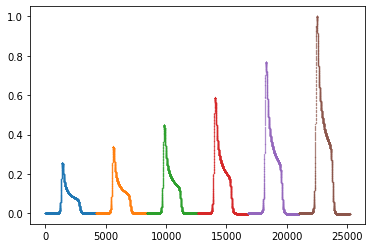

24077 0.217128710313935
26092 0.2164110619798216
27227 -0.3126342258276447
27599 -0.1695334067207075


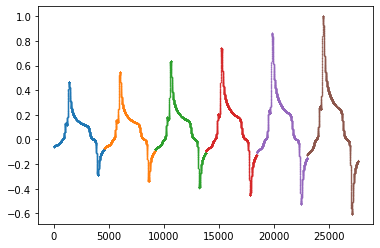

16079 0.1793531940812745
16910 0.1761927354202474
17403 -0.3783375706465881
17999 -0.1242604838817766


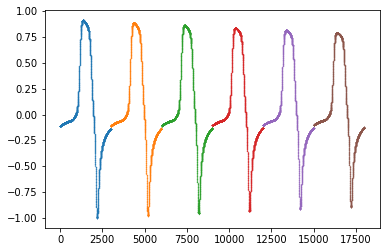

14018 -0.0879803190352069
16000 -0.0891563100069841
16799 -0.624743319837521


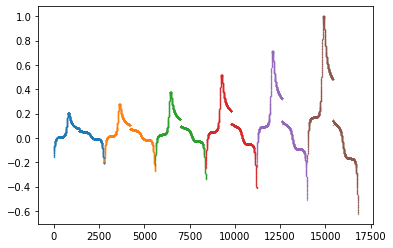

24262 0.2762717756292725
25847 0.2754475236864045
26752 -0.2443080263895642
27599 -0.0813582846464696


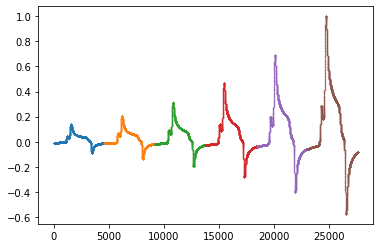

17636 -0.0168164817235636
19653 -0.0182785236195822
20029 -0.4742646558942684
20399 -0.2193709912197498


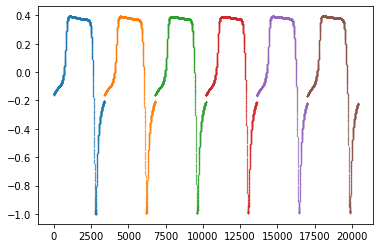

20251 0.2768734819700589
21393 0.2753626000112191
22069 -0.2458941994899581
22799 -0.0804756088328497


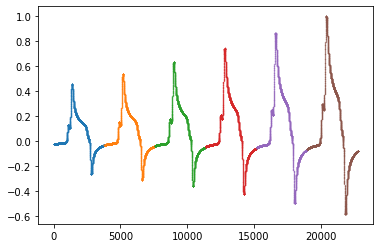

14541 0.1046246433897019
16124 0.1026919591934224
16661 -0.5124339444006066
16799 -0.3387694494438097


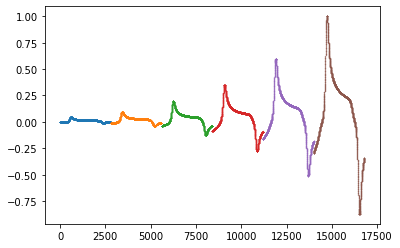

13117 0.3232347123622033
13256 0.3168665159717991


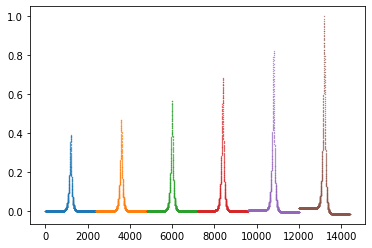

28467 0.0869264560353122
30842 0.0866389500567984
31658 -0.4498595120464421
32399 -0.1792939669255054


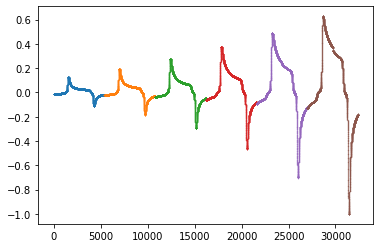

23331 0.3310863670020019
24128 0.3293105314459356


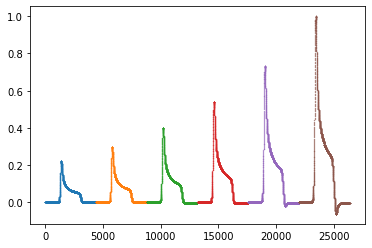

12267 0.0285936522581605
13889 0.0280833498583404
14380 -0.4936211135917376
14399 -0.4504948918075577


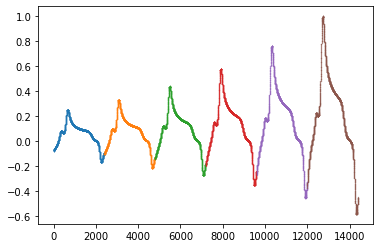

20636 0.2842275824862376
23179 0.2835592665314546
23692 -0.1496500291704558
23999 -0.0691039511920845


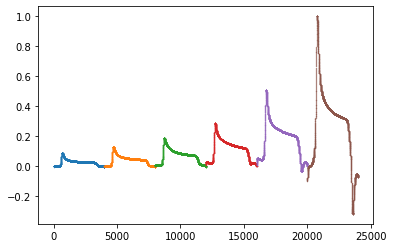

8419 0.3633284950594685
8481 0.3552238368918177
9282 -0.3552238368918177
9611 -0.0


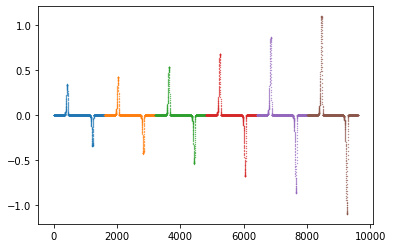

28403 0.2548336757112139
29352 0.2537216549265184
31370 -0.3631755985625201
32399 -0.1138328880971252


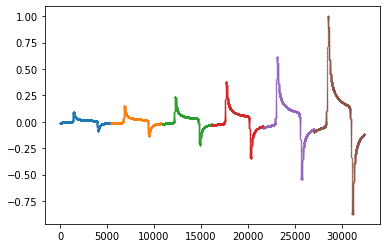

8389 0.7212267023266365
8435 0.6934052194448725
9236 -0.6934052194448725
9611 -0.0


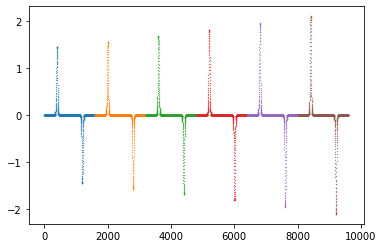

17116 0.2717117212248863
17926 0.2687454004322505
18799 -0.1908879246159728
19199 -0.0898253467697609


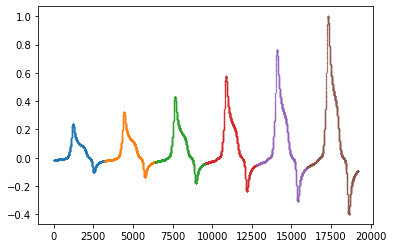

8392 0.4051237219236911
8441 0.3840487229977746
9242 -0.3840487229977746
9611 -0.0


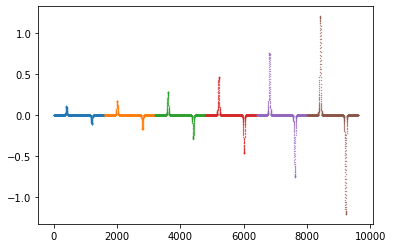

17791 0.1663177749379273
19407 0.1652982012301657
20123 -0.4412572605051386
20399 -0.2458065655172829


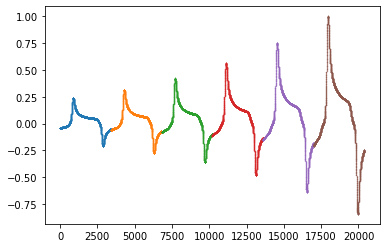

11621 0.2060446125644948
12427 0.2026612392834075
12928 -0.3688123233664185
13199 -0.1894789001772321


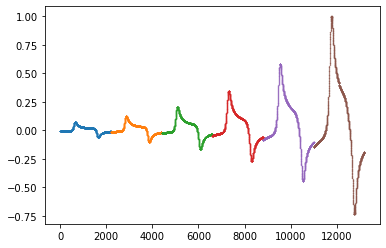

12819 0.2304683152952102
13451 0.2264356199804272
14126 -0.2993567302714661
14399 -0.1534318841640858


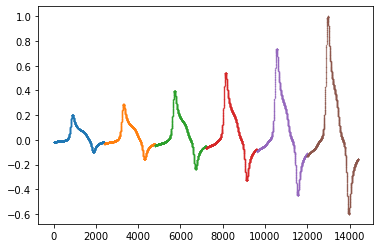

25035 0.1659490828224017
27325 0.165133212073901
28213 -0.4802460959028845
28799 -0.2448573467028867


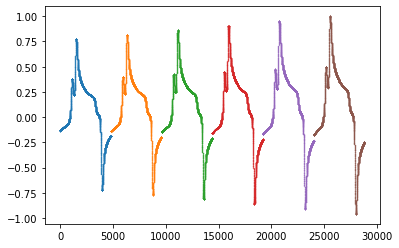

20870 0.2338056156400602
21871 0.2285158395376407
23380 -0.4016196144879355
23999 -0.1513519406731808


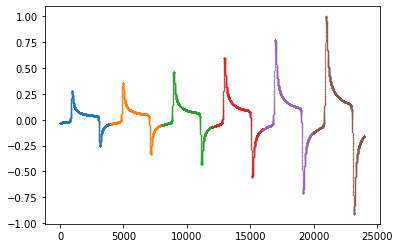

17916 0.1961144559214989
19199 0.194944309945108
19949 -0.3757729777657437
20399 -0.2009177379864357


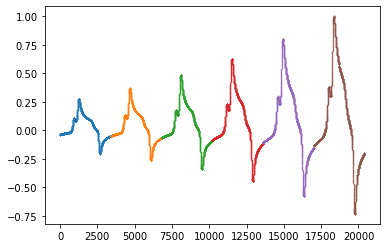

11374 0.3244521125867083
12462 0.3233150303232333


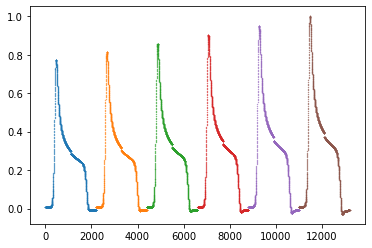

25258 0.3203604481973219
26073 0.317778362195863
27981 -0.113332962077199
28799 -0.0179953998470147


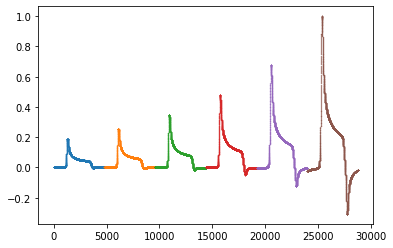

24020 0.2120024722717076
25300 0.2058728110502162
27060 -0.3603294752027888
27599 -0.1786238959742052


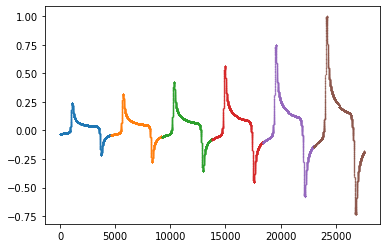

21819 0.1962626695681767
23337 0.1939737073686659
24761 -0.4307092030727844
25199 -0.2029488452437413


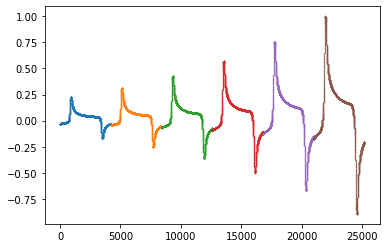

21403 0.1070563550832961
24439 0.1037159709904629
24971 -0.5225657271800793
25199 -0.2878625064284958


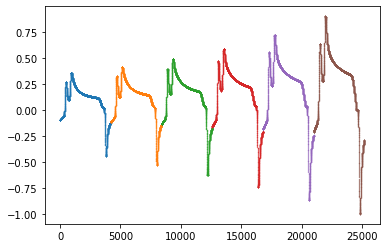

24943 0.1540059717902182
27695 0.1531856149513999
28303 -0.4726882375732905
28799 -0.213472171798334


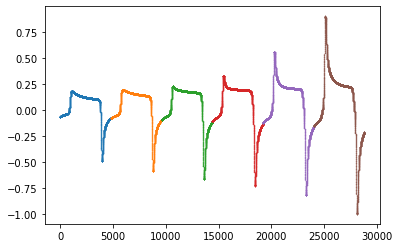

8395 0.5222297891135234
8446 0.4801860778909213
9247 -0.4801860778909213
9611 -0.0


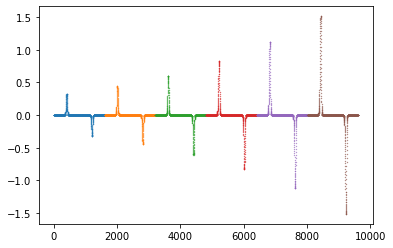

14672 0.1562520019792681
15962 0.1552321676036981
16592 -0.4380563281245342
16799 -0.2599594399127145


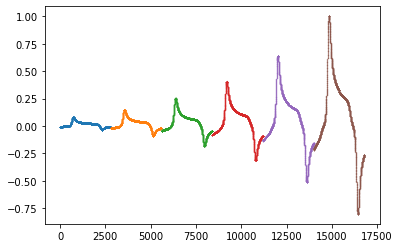

8395 0.4876095666912567
8447 0.4272903703269076
9248 -0.4272903703269111
9611 -0.0


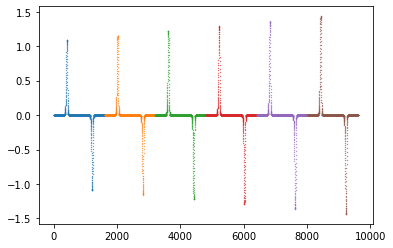

14474 0.3239812620450428
16043 0.3219514797987491


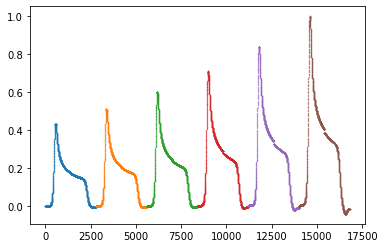

20710 0.206342012951
23043 0.2041638045274215
23648 -0.3869992277244319
23999 -0.1877720388789192


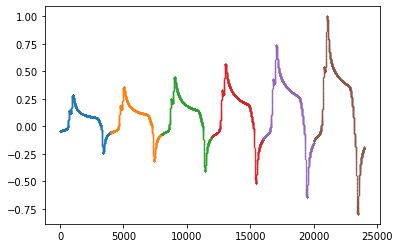

18842 0.2690944873106386
20412 0.2656569271630827
21077 -0.2615823828739859
21599 -0.0945560392090912


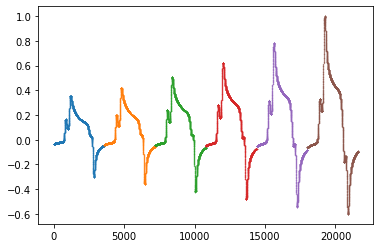

18257 0.3099644183784835
18949 0.3072398139393121


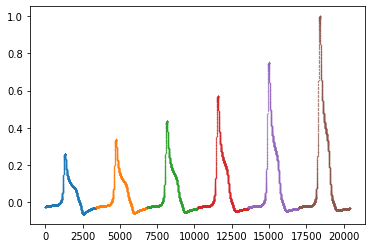

8395 0.632456038115118
8446 0.5396362411896093
9247 -0.5396362411896093
9611 -0.0


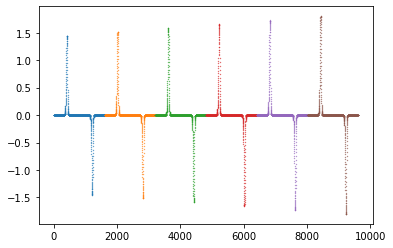

20052 0.2555535316075241
21103 0.2522642545751352
22196 -0.3137333286485086
22799 -0.1159106701849098


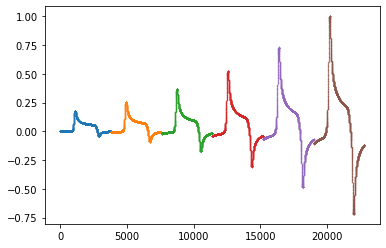

14984 0.2474596063091368
15665 0.2436655315429194
16400 -0.25810674503114
16799 -0.1284953531495353


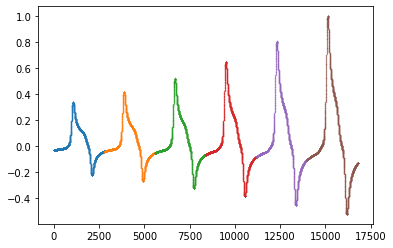

<Figure size 432x288 with 0 Axes>

In [45]:
# Step three – calculate merge points
def calculate_merge_reps(mech, peak_frac=0.33, sr_rep=5):

   def find_index(l, r, target, data, decreasing=True):
      while (l <= r):
         m = l+(r-l) // 2
         if data.loc[m, 'A'] < target:
            if decreasing:
               r = m-1
            else:
               l = m+1
         else:
            if decreasing:
               l = m+1
            else:
               r = m-1
      return l if l <= data.index[-1] else data.index[-1]

   scan_rates = mech.data['v'].unique()
   rep_data = mech.data[mech.data['v'] == scan_rates[sr_rep]]

   max_A = max(rep_data['A'])
   min_A = min(rep_data['A'])
   ind_max_A = rep_data[rep_data['A'] == max_A].index[0]
   ind_max_V = rep_data[rep_data['V'] == max(rep_data['V'])].index[0]
   fwd_diff_A = rep_data.loc[ind_max_V, 'A']
   ind_min_A = rep_data[rep_data['A'] == min_A].index[-1]
   ind_min_V = rep_data.index[-1]
   rev_diff_A = rep_data.loc[ind_min_V, 'A']
   peak_ratio = min_A/max_A if abs(min_A) < abs(max_A) else max_A/min_A
   reversible = abs(peak_ratio) >= 0.1 
   pos_frac_peak_height = fwd_diff_A + peak_frac*(max_A-fwd_diff_A)
   neg_frac_peak_height = rev_diff_A - peak_frac*abs(min_A-rev_diff_A)
   
   merge_points = []
   # forward, right side
   merge_points.append(find_index(ind_max_A, ind_max_V, pos_frac_peak_height, rep_data))
   # forward, left side
   merge_points.append(find_index(rep_data.index[0], ind_max_A, pos_frac_peak_height, rep_data, decreasing=False))
   
   if reversible:
      # reverse, right side
      merge_points.append(find_index(ind_max_V+1, ind_min_A, neg_frac_peak_height, rep_data))
      # reverse, left side
      merge_points.append(find_index(ind_min_A, ind_min_V, neg_frac_peak_height, rep_data, decreasing=False))
   
   mech.data['merge_point'] = False
   for point in merge_points:
      mech.data.loc[point, 'merge_point'] = True
   
for i in range(10):
   mechs = get_mechs()
   get_files(mechs)
   for i, mech in enumerate(mechs):
      calculate_merge_reps(mech)
      indices = mech.data[mech.data['merge_point'] == True].index
      for i in indices:
         print(mech.data.loc[i, 'V'], mech.data.loc[i, 'A'])
      plot(mech.data)


In [ ]:
# Step four – do necessary data flipping, scaling...
def adjust_data(mech):
   flip = -1 if mech.cathodic else 1
   mech.data['A'] = mech.data.loc[:,'A'].apply(lambda x : x*flip*mech.scaling)
   all_curs = []
   all_merges = []
   if mech.cathodic:
      for v in mech.data['v'].unique():
         t = mech.data[mech.data['v'] == v].copy()
         lcl_currents = list(t.loc[:,'A'])
         fwd = lcl_currents[:len(lcl_currents)//2]
         rev = lcl_currents[len(lcl_currents)//2:]
         fwd = fwd[::-1]
         rev = rev[::-1]
         fwd.extend(rev)
         all_curs.extend(fwd)
         lcl_merges = list(t.loc[:,'merge_point'])
         fwd2 = lcl_merges[:len(lcl_merges)//2]
         rev2 = lcl_merges[len(lcl_merges)//2:]
         fwd2 = fwd2[::-1]
         rev2 = rev2[::-1]
         fwd2.extend(rev2)
         all_merges.extend(fwd2)
      mech.data['A'] = all_curs
      mech.data['merge_point'] = all_merges
   min_V = min(mech.data['V'])
   mech.data['V'] = mech.data.loc[:,'V'].apply(lambda x: x-min_V)

In [ ]:

# Helper function to merge_data
def __merge(host, guest, fwd):

   def add(v, x, y):
      nonlocal fwd
      nonlocal host
      nonlocal guest
      # When merging datasets, sometimes a potential (v)
      # is only present in one, in that case, we fill in either
      # the extrapolated diffusion limited current or the background
      # current
      if fwd:
         if v < min(host['V']):
            x = host.loc[host.index[0],'A']
         if v > max(host['V']):
            x = host.loc[host.index[-1],'A']
         if v < min(guest['V']):
            y = guest.loc[guest.index[0],'A']
         if v > max(guest['V']):
            y = guest.loc[guest.index[-1],'A']
      else:
         if v < min(host['V']):
            x = host.loc[host.index[-1],'A']
         if v > max(host['V']):
            x = host.loc[host.index[0],'A']
         if v < min(guest['V']):
            y = guest.loc[guest.index[-1],'A']
         if v > max(guest['V']):
            y = guest.loc[guest.index[0],'A']

      return x + y

   df = host.merge(guest, how='outer', left_on=['V'], right_on=['V'])
   df.loc[:, 'A'] = df.apply(lambda x: add(x['V'], x['A_x'], x['A_y']), axis=1)
   return df
   
# Step five, iteratively merge
def merge_data(host, guest, srs):
   # shift guest data relative to host data pre-merge
   min_V = min(host['V'])
   host['V'] = host.loc[:,'V'].apply(lambda x: x-min_V)
   mp_host = host.loc[host['merge_point'] == True].index[-1]
   host_mp_V = host.loc[mp_host, 'V']
   mp_guest = guest.loc[guest['merge_point'] == True].index[0]
   guest_mp_V = guest.loc[mp_guest, 'V']
   shift = guest_mp_V - host_mp_V
   rand_plus = r.randint(0, 200)
   guest['V'] = guest.loc[:,'V'].apply(lambda x: (x-shift)+rand_plus)
   #merge the guest and host
   merged = pd.DataFrame()
   srs_host = host['v'].unique()
   srs_guest = guest['v'].unique()
   srs_fin = []
   prev_length = 0
   for i in range(6):
      t1 = host.loc[host['v'] == srs_host[6-i-1]].copy()
      t2 = guest.loc[guest['v'] == srs_guest[6-i-1]].copy()
      fwdt1 = t1[:len(t1)//2]
      fwdt2 = t2[:len(t2)//2]
      revt1 = t1[len(t1)//2:]
      revt2 = t2[len(t2)//2:]
      merged = pd.concat([merged, __merge(fwdt1, fwdt2, True)])
      merged = pd.concat([merged, __merge(revt1, revt2, False)])
      merged = merged[['V', 'A', 'merge_point_x', 'merge_point_y']]
      cur_sr = [srs[6-i-1]]*(len(merged)-prev_length)
      srs_fin.extend(cur_sr)
      prev_length = len(merged)
   merged['v'] = srs_fin
   merged['merge_point'] = merged.apply(lambda x : True if x['merge_point_y'] == True else False, axis=1)
   merged.drop(['merge_point_x', 'merge_point_y'], axis=1, inplace=True)
   return merged